In [17]:
%matplotlib inline
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
import itertools
from matplotlib.lines import Line2D
import matplotlib.pylab as plb
from sklearn.linear_model import LinearRegression
import matplotlib.style as style
from matplotlib.patches import Patch

# data_path = "/Users/Broccolee/Google Drive/Grad School/TU BERLIN/Negative Emissions & Carbon Markets/Data/"
# plot_path = "/Users/Broccolee/Google Drive/Grad School/TU BERLIN/Negative Emissions & Carbon Markets/Plots/"
data_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Data/"
plot_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Plots/"

pd.set_option('display.max_columns', 500)

In [18]:
#uploading data with carbon price
equity_remind=pd.read_excel(data_path+'REMIND_equity_analysis_wCP.xls')
equity_image=pd.read_excel(data_path+'IMAGE_equity_analysis_wCP.xls')

Master_wCP=pd.read_excel(data_path+'MASTERDF_equity_analysis_wCP.xls') #master datafram with all regions from IMAGE and REMIND
allmodels_7regions_wCP=pd.read_excel(data_path+'allmodels_consolited_regions_df_wCP.xls') #consolidated with REMIND regions
allmodels_equal_df=pd.read_excel(data_path+'allmodels_df.xls')

In [3]:
allmodels_equal_df.Scenario.unique()

array(['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP1-26-SPA1-V17',
       'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP5-26-SPA5-V17',
       'SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17'], dtype=object)

# BECCS investments vs. CarbonPriceXCDR

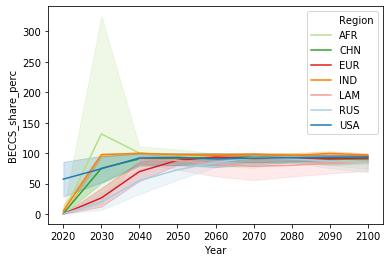

In [8]:
#modelled share(%) of BECCS within total CDR for each year for each country
allmodels_equal_df['BECCS_share_perc'] = (allmodels_equal_df.BECCS)/(allmodels_equal_df.TOTAL_CDR)*100
allmodels_equal_df.BECCS_share_perc
colours = sns.color_palette("Paired",12)
colour_palette = [colours[2], colours[3],colours[5],colours[7],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))]
sns.lineplot(x='Year',y='BECCS_share_perc' ,data=data, hue="Region",palette=colour_palette, label='BECCS share in total CDR') #hue="Region"
#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
plt.savefig(plot_path + 'Share of BECCS in total CDR by region.png', bbox_inches='tight')

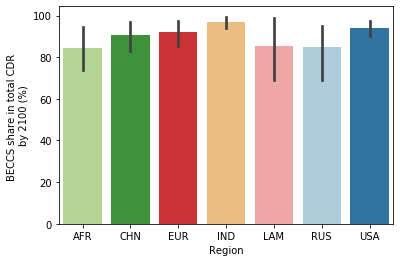

In [4]:
#modelled share(%) of BECCS within total CDR for each year for each country
allmodels_equal_df['BECCS_share_perc'] = (allmodels_equal_df.BECCS)/(allmodels_equal_df.TOTAL_CDR)*100
allmodels_equal_df.BECCS_share_perc
colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
yr=2100
data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))& (allmodels_equal_df.Year==yr)]
ax=sns.barplot(x='Region',y='BECCS_share_perc' ,data=data, palette=colour_palette) #hue="Scenario"
ax.set(xlabel='Region', ylabel='BECCS share in total CDR \nby 2100 (%)')


plt.savefig(plot_path + 'Bar - Share of BECCS in 2100 by region.png', bbox_inches='tight')

In [4]:
Master_wCP[(Master_wCP.Region==('World'))&(Master_wCP.Year==2100)]['CUM_BECCS']

242    4.772504e+05
485    7.982530e+05
647    4.223842e+05
755    6.182463e+05
863    1.178542e+06
971    9.189360e+05
Name: CUM_BECCS, dtype: float64

/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


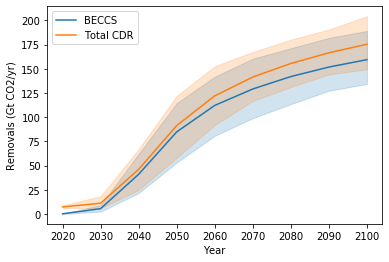

In [16]:
df=allmodels_equal_df[(allmodels_equal_df.Region==('World'))]#[['BECCS','TOTAL_CDR']]
df['BECCS']=df['BECCS']*1/100
df['TOTAL_CDR']=df['TOTAL_CDR']*1/100
ax=sns.lineplot(x='Year',y='BECCS',data=df, label="BECCS") 
ax=sns.lineplot(x='Year',y='TOTAL_CDR',data=df, label="Total CDR") 
ax.set_ylabel('Removals (Gt CO2/yr)')
plt.savefig(plot_path + 'BECCS_vs_Total_CDR.png', bbox_inches='tight')

/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


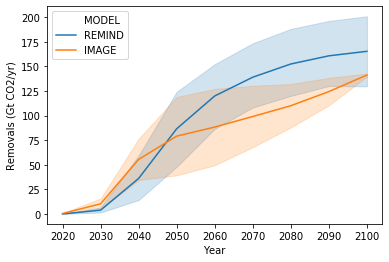

In [23]:
df=allmodels_equal_df[(allmodels_equal_df.Region==('World'))]

df['BECCS']=df['BECCS']*1/100

ax=sns.lineplot(x='Year',y='BECCS',data=df, hue= "MODEL", legend="full") 
ax.set_ylabel('Removals (Gt CO2/yr)')
plt.savefig(plot_path + 'BECCS_deployment_by_model.png', bbox_inches='tight')

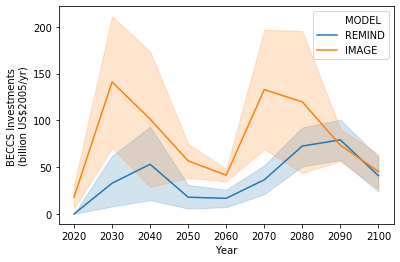

In [24]:
df=allmodels_equal_df[(allmodels_equal_df.Region==('World'))]

ax=sns.lineplot(x='Year',y='BECCS_Investments',data=df, hue= "MODEL", legend="full") 
ax.set_ylabel('BECCS Investments \n(billion US$2005/yr)')
plt.savefig(plot_path + 'BECCS_investments_by_model.png', bbox_inches='tight')

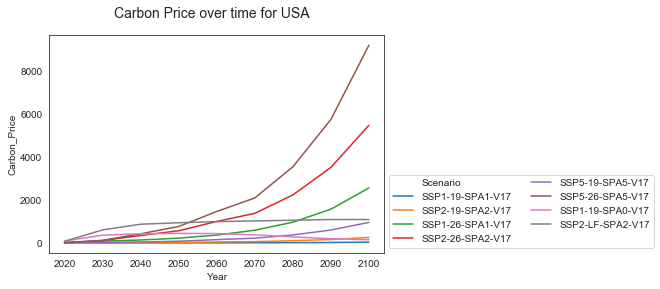

In [91]:
#CDR over time, Carbon price over time, BECCS investment over time
#rego = ['USA']
scen=['SSP1-19-SPA0-V17', 
 'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17',
 'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17',
 'SSP5-26-SPA5-V17']
yr=['2020','2030','2040','2050']
single_reg=allmodels_equal_df[(allmodels_equal_df.Scenario.isin(scen)
                               ) & (allmodels_equal_df.Region==("USA"))].copy()
sns.lineplot(x='Year',y='Carbon_Price',data=single_rego, legend="full", hue="Scenario")
plt.suptitle('Carbon Price overm time for USA', fontsize = 14)
plt.legend(loc='lower left', bbox_to_anchor=(1,0),ncol=2)
plt.savefig(plot_path + 'Carbon Price over time for USA- all scenarios.png', bbox_inches='tight')

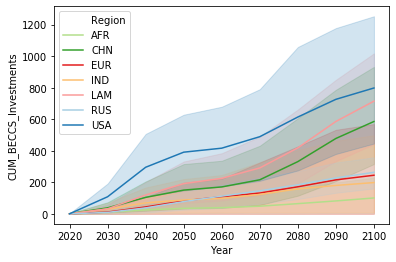

In [13]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
scen_15 = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17','SSP5-26-SPA5-V17']

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
sns.lineplot(x='Year',y='CUM_BECCS_Investments' ,data=data, hue="Region",palette=colour_palette)

#plt.suptitle('Cumulative BECCS investments over time for all regions and scenarios', fontsize = 14)

#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
plt.savefig(plot_path + 'Cum BECCS investments over time- all scenarios.png', bbox_inches='tight')

# Annual BECCS investment analysis

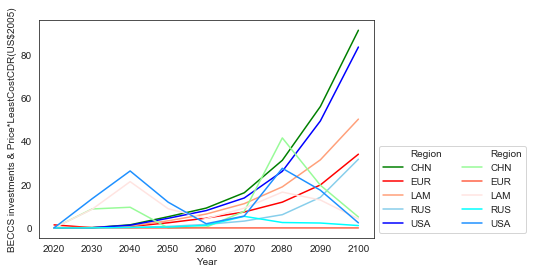

In [101]:
rego = ['LAM', 'USA', 'CHN', 'RUS', 'EUR','IND']
scen='SSP1-19-SPA1-V17'
PriceXCDRperBillion=main_remind['PriceXTotalCDR'].astype(float)/1000000000
single_scen=main_remind[(main_remind.Scenario==scen) &
                        (main_remind.Region.isin(rego))].copy()
ax=sns.lineplot(x='Year',y=PriceXCDRperBillion ,data=single_scen, hue="Region", palette=['green','red','lightsalmon','skyblue','blue'], legend="full")
ax=sns.lineplot(x='Year',y='BECCS_Investments',data=single_scen, hue="Region", palette=['palegreen','tomato','mistyrose','aqua','dodgerblue'])
ax.set(xlabel='Year', ylabel='BECCS investments & Price*LeastCostCDR(US$2005)')
plt.legend(loc='lower left', bbox_to_anchor=(1,0),ncol=2)
plt.show()
#plt.savefig(plot_path + 'Annual_BECCS_vs_Price*LeastCostCDR.png', bbox_inches='tight')

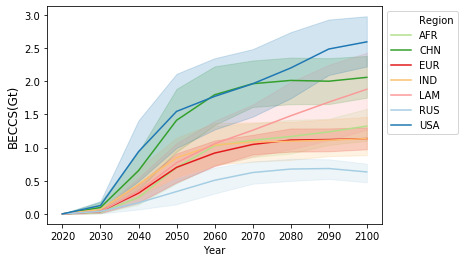

In [25]:
#BECCS development over time
colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN', 'EUR', 'IND', 'LAM', 'RUS', 'USA']
scen_15 = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17','SSP5-26-SPA5-V17']

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]
#data.loc[:,'BECCS']=data.loc[:,'BECCS']*10**-3
ax=sns.lineplot(x='Year',y='BECCS' ,data=data, hue="Region",palette=colour_palette)
plt.ylabel('BECCS(GtCO2)', fontsize = 12)
plt.legend(bbox_to_anchor=(1,1),ncol=1)

#plt.legend(bbox_to_anchor=(1,1),ncol=1)

plt.savefig(plot_path + 'BECCS over time- regions.png', bbox_inches='tight')

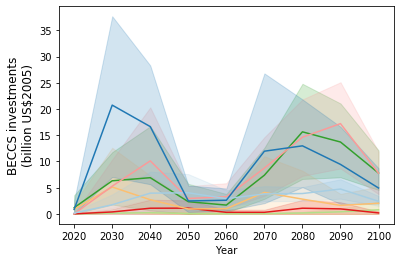

In [27]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
scen_15 = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17','SSP5-26-SPA5-V17']

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
ax=sns.lineplot(x='Year',y='BECCS_Investments' ,data=data, hue="Region",palette=colour_palette)
plt.ylabel('BECCS investments\n(billion US$2005)', fontsize = 12)
ax.legend_.remove()
#plt.suptitle('BECCS investments over time for all regions and scenarios', fontsize = 14)

#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
plt.savefig(plot_path + 'Least cost: BECCS investments over time- all scenarios.png', bbox_inches='tight')

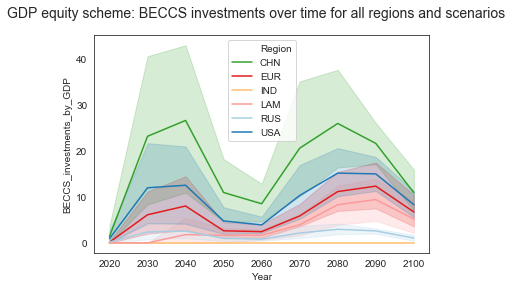

In [97]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
sns.lineplot(x='Year',y='BECCS_investments_by_GDP' ,data=data, hue="Region",palette=colour_palette)
plt.suptitle('GDP equity scheme: BECCS investments over time for all regions and scenarios', fontsize = 14)

#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
plt.savefig(plot_path + 'GDP equity scheme: BECCS investments over time- all scenarios.png', bbox_inches='tight')

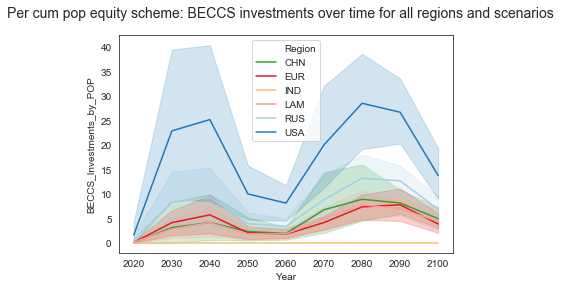

In [100]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
#CHN 3 RUS 0, USA 1, AFR 2, LAM 4, EUR 5, IND 6reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR']
data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
sns.lineplot(x='Year',y='BECCS_Investments_by_POP' ,data=data, hue="Region",palette=colour_palette)
plt.suptitle('Per cum pop equity scheme: BECCS investments over time for all regions and scenarios', fontsize = 14)

#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
plt.savefig(plot_path + 'CUM POP equity scheme: BECCS investments over time- all scenarios.png', bbox_inches='tight')

# Carbon Price X CDR over time

In [51]:
# reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR','IND']
# scen_15 = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
# scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] # high overshoot
# scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17','SSP5-26-SPA5-V17']

# colours = sns.color_palette("Paired",12)
# colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
# scen='SSP1-19-SPA1-V17'
# CDRXPriceperTrilllion=allmodels_equal_df['PriceXTotalCDR'].astype(float)/1000000000000
# data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))].copy()
# sns.lineplot(x='Year',y=CDRXPriceperTrilllion ,data=data, hue="Region", palette=colour_palette, legend="full")
# #sns.lineplot(x='Year',y='BECCS_investments_by_GDP',data=data, hue="Region", palette=['palegreen','tomato','mistyrose','aqua','dodgerblue'])
# #ax.set(xlabel='Year', ylabel='BECCS investments & Price*LeastCostCDR(US$2005)')
# plt.legend(loc='lower left', bbox_to_anchor=(1,0),ncol=2)
# plt.suptitle('Carbon Price X least cost CDR over time', fontsize = 14)
# plt.show()
# #plt.savefig(plot_path + 'Annual_BECCS_vs_Price*LeastCostCDR.png', bbox_inches='tight')

# CDR_by_GDPXPriceperTrillion=allmodels_equal_df['CDR_fair_share_by_GDPXCarbonPrice'].astype(float)/1000000000000
# data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))].copy()
# sns.lineplot(x='Year',y=CDR_by_GDPXPriceperTrillion ,data=data, hue="Region", palette=colour_palette, legend="full")
# #sns.lineplot(x='Year',y='BECCS_investments_by_GDP',data=data, hue="Region", palette=['palegreen','tomato','mistyrose','aqua','dodgerblue'])
# #ax.set(xlabel='Year', ylabel='BECCS investments & Price*LeastCostCDR(US$2005)')
# plt.legend(loc='lower left', bbox_to_anchor=(1,0),ncol=2)
# plt.suptitle('Carbon Price X CDR fair share by GDP over time', fontsize = 14)
# plt.show()
# #plt.savefig(plot_path + 'Annual_BECCS_vs_Price*LeastCostCDR.png', bbox_inches='tight')

# CDR_by_POPXPriceperTrillion=allmodels_equal_df['CDR_fair_share_by_CUM_POPXCarbonPrice'].astype(float)/1000000000000
# data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))].copy()
# sns.lineplot(x='Year',y=CDR_by_POPXPriceperTrillion ,data=data, hue="Region", palette=colour_palette, legend="full")
# #sns.lineplot(x='Year',y='BECCS_investments_by_GDP',data=data, hue="Region", palette=['palegreen','tomato','mistyrose','aqua','dodgerblue'])
# #ax.set(xlabel='Year', ylabel='BECCS investments & Price*LeastCostCDR(US$2005)')
# plt.legend(loc='lower left', bbox_to_anchor=(1,0),ncol=2)
# plt.suptitle('Carbon Price X CDR fair share by CUM POP over time', fontsize = 14)
# plt.show()

# plt.savefig(plot_path + 'CarbonPriceXCDR_analysis.png', bbox_inches='tight')


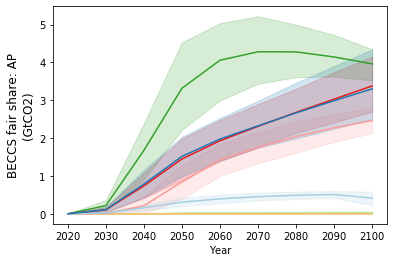

In [61]:
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']

#fig, axes = plt.subplots(1,2, figsize=(10,6))
#plt.suptitle('CDR over time', fontsize = 21)
#plt.subplots_adjust(top=0.9, wspace=0.3, hspace = 0.3)

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))].copy()
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
data.loc[:,'BECCS_fair_share_by_GDP']=data.loc[:,'BECCS_fair_share_by_GDP']*10**-3
data.loc[:,'BECCS_fair_share_by_CUM_POP']=data.loc[:,'BECCS_fair_share_by_CUM_POP']*10**-3

ax1=sns.lineplot(x='Year',
                 y='BECCS_fair_share_by_GDP',
                 data=data, hue="Region",
                 palette=colour_palette,
                 legend=False)
plt.ylabel('BECCS fair share: AP\n(GtCO2)', fontsize = 12)


plt.savefig(plot_path + 'BECCS_fair_share_AP.png', bbox_inches='tight')

Text(0, 0.5, 'Population (Million)')

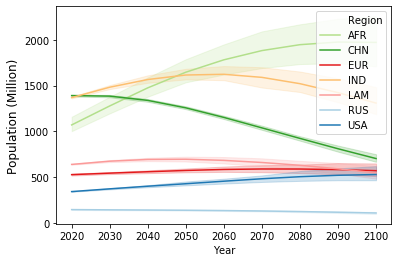

In [11]:
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']

#fig, axes = plt.subplots(1,2, figsize=(10,6))
#plt.suptitle('CDR over time', fontsize = 21)
#plt.subplots_adjust(top=0.9, wspace=0.3, hspace = 0.3)

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))].copy()
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]

ax1=sns.lineplot(x='Year',
                 y='Population',
                 data=data, hue="Region",
                 palette=colour_palette)
plt.ylabel('Population (Million)', fontsize = 12)


#plt.savefig(plot_path + 'BECCS_fair_share_AP.png', bbox_inches='tight')

In [7]:
allmodels_equal_df.loc[(allmodels_equal_df.Region==('CHN'))&(allmodels_equal_df.Year==2070
                                                            )]['BECCS_fair_share_by_GDP'].median()

4200.860000000001

In [9]:
allmodels_equal_df.loc[]

,Unnamed: 0,MODEL,Region,Scenario,Year,Total_CO2,Total_GHG,BECCS,LANDCDR,TOTAL_CDR,CO2_Emissions,CUM_CO2,CUM_CDR,CUM_BECCS,Unit_CO2,BECCS_Investments,CUM_BECCS_Investments,Unit_Investment,Carbon_Price,Population,GDP,Unit_Population,cumPopulation,2016_emissions,em_change,Unit_GDP,GDP_cap,GDP_cap_avg,GDP_cap_CoI_nan,GDP_cap_CoI,GDP_CoI_nan,GDP_CoI,GDP_CoI_frac,CDR_fair_share_by_GDP,BECCS_fair_share_by_GDP,BECCS_investments_by_GDP,CUM_CDR_fair_share_by_GDP,CUM_BECCS_fair_share_by_GDP,CUM_BECCS_investments_by_GDP,Global_CUM_CO2_by_CUM_POP,Fair_share_by_CUM_POP,Excess_emissions_by_CUM_POP,Exc_em_fac_by_CUM_POP,CDR_fair_share_by_CUM_POP,BECCS_fair_share_by_CUM_POP,CUM_CDR_fair_share_by_CUM_POP,CUM_BECCS_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,CUM_CDR_model_vs_fair_share_by_CUM_POP,CUM_CDR_model_vs_fair_share_by_GDP,BECCS_Investments_by_POP,CUM_BECCS_Investments_by_POP,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_model_vs_fair_share_by_GDP,BECCS_invest_model_vs_FairShare_by_POP,BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_invest_model_vs_FairShare_by_POP,CUM_BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_model_vs_fair_share_by_CUM_POP,CUM_BECCS_model_vs_fair_share_by_GDP
0,0,REMIND,AFR,SSP1-19-SPA1-V17,2020,1215.49,3233.00,0.01,222.62,222.63,3455.63,98289.53,222.63,0.01,Mt/yr,0.00,0.00,billion US$2005/yr,1.00,996.70,2288000.00,Mio,21023.29,3127.64,1.10,USD Million,2295.58,13416.41,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.80,142906.55,-44617.02,NaN,0.00,0.00,0.00,0.00,-222.63,-222.63,-222.63,-222.63,0.00,0.00,-0.01,-0.01,0.00,0.00,0.00,0.00,-0.01,-0.01
1,1,REMIND,AFR,SSP1-19-SPA1-V17,2030,1212.03,2952.00,30.86,77.86,108.72,3060.72,130871.28,1879.38,154.34,Mt/yr,0.14,0.69,billion US$2005/yr,1.14,1181.00,4293000.00,Mio,31911.79,3127.64,0.98,USD Million,3635.06,18619.14,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.48,206638.40,-75767.11,NaN,0.00,0.00,0.00,0.00,-108.72,-108.72,-1879.38,-1879.38,0.00,0.00,-30.86,-30.86,-0.14,-0.14,-0.69,-0.69,-154.33,-154.33
2,2,REMIND,AFR,SSP1-19-SPA1-V17,2040,1618.56,3692.00,352.20,21.35,373.55,4065.55,166502.66,4290.76,2069.64,Mt/yr,0.00,1.39,billion US$2005/yr,1.86,1351.00,8860000.00,Mio,44571.79,3127.64,1.30,USD Million,6558.11,25680.05,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.93,264448.85,-97946.19,NaN,0.00,0.00,0.00,0.00,-373.55,-373.55,-4290.76,-4290.76,0.00,0.00,-352.20,-352.20,0.00,0.00,-1.38,-1.38,-2069.63,-2069.63
3,3,REMIND,AFR,SSP1-19-SPA1-V17,2050,388.37,2444.00,949.00,28.51,977.51,3421.51,203937.96,11046.06,8575.64,Mt/yr,0.00,1.39,billion US$2005/yr,3.04,1488.00,17450000.00,Mio,58766.79,3127.64,1.09,USD Million,11727.15,33297.96,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.38,316193.01,-112255.05,NaN,0.00,0.00,0.00,0.00,-977.51,-977.51,-11046.06,-11046.06,0.00,0.00,-949.00,-949.00,0.00,0.00,-1.39,-1.39,-8575.63,-8575.63
4,4,REMIND,AFR,SSP1-19-SPA1-V17,2060,-814.20,738.90,1144.00,43.11,1187.11,1926.01,230675.57,21869.17,19040.64,Mt/yr,0.00,1.39,billion US$2005/yr,4.95,1589.00,30720000.00,Mio,74151.79,3127.64,0.62,USD Million,19332.91,41109.53,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.84,359195.88,-128520.31,NaN,0.00,0.00,0.00,0.00,-1187.11,-1187.11,-21869.17,-21869.17,0.00,0.00,-1144.00,-1144.00,0.00,0.00,-1.39,-1.39,-19040.63,-19040.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,536,IMAGE,EUR,SSP2-LF-SPA2-V17,2060,-355.92,-22.60,1198.62,182.49,1381.10,1546.06,262029.65,36628.17,21176.73,Mt/yr,0.36,455.33,billion US$2005/yr,992.73,577.66,31002575.68,Mio,38487.54,800.74,0.35,USD Million,100350.99,59884.06,100350.99,100350.99,31002575.68,31002575.68,0.18,2810.69,2298.07,6.31,57519.69,47314.11,870.54,8.90,171178.63,90851.03,0.12,1857.54,1518.76,38304.58,31523.29,476.44,1429.59,16

In [8]:
allmodels_equal_df.loc[(allmodels_equal_df.Region==('CHN'))&(allmodels_equal_df.Year==2060
                                                            )]['BECCS_fair_share_by_GDP'].median()

4464.44

In [22]:
#BECCS_fair_share_by_GDP
allmodels_equal_df.loc[(allmodels_equal_df.Year==2100
                       )&(allmodels_equal_df.Region==('RUS'))
                      ]['BECCS_fair_share_by_CUM_POP'].median()


2336.8999999999996

In [11]:
# AP: CUM_BECCS_fair_share_by_GDP, CUM_BECCS_fair_share_by_CUM_POP
reg=['CHN']#,'EUR','USA']
allmodels_equal_df.loc[(allmodels_equal_df.Year==2100
                       )&(allmodels_equal_df.Region==('CHN'))
                      ]['CUM_BECCS_fair_share_by_GDP'].median()


247369.615

In [14]:
allmodels_equal_df.loc[(allmodels_equal_df.Year==2030
                       )&(allmodels_equal_df.Region==('RUS'))
                      ]['CUM_BECCS_fair_share_by_CUM_POP'].median()

325.23

In [15]:
allmodels_equal_df.loc[(allmodels_equal_df.Year==2030
                       )&(allmodels_equal_df.Region==('USA'))
                      ]['CUM_BECCS_fair_share_by_CUM_POP'].median()

893.665

In [5]:
# CUM_BECCS_fair_share_by_GDP, CUM_BECCS_fair_share_by_CUM_POP
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']

#fig, axes = plt.subplots(1,2, figsize=(10,6))
#plt.suptitle('CDR over time', fontsize = 21)
#plt.subplots_adjust(top=0.9, wspace=0.3, hspace = 0.3)

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))].copy()
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
data.loc[:,'BECCS_fair_share_by_GDP']=data.loc[:,'BECCS_fair_share_by_GDP']*10**-3
data.loc[:,'BECCS_fair_share_by_CUM_POP']=data.loc[:,'BECCS_fair_share_by_CUM_POP']*10**-3

ax1=sns.lineplot(x='Year',
                 y='BECCS_fair_share_by_GDP',
                 data=data, hue="Region",
                 palette=colour_palette,
                 legend=False)
plt.ylabel('BECCS fair share: AP\n(GtCO2)', fontsize = 12)


plt.savefig(plot_path + 'BECCS_fair_share_AP.png', bbox_inches='tight')

,Unnamed: 0,MODEL,Region,Scenario,Year,Total_CO2,Total_GHG,BECCS,LANDCDR,TOTAL_CDR,CO2_Emissions,CUM_CO2,CUM_CDR,CUM_BECCS,Unit_CO2,BECCS_Investments,CUM_BECCS_Investments,Unit_Investment,Carbon_Price,Population,GDP,Unit_Population,cumPopulation,2016_emissions,em_change,Unit_GDP,GDP_cap,GDP_cap_avg,GDP_cap_CoI_nan,GDP_cap_CoI,GDP_CoI_nan,GDP_CoI,GDP_CoI_frac,CDR_fair_share_by_GDP,BECCS_fair_share_by_GDP,BECCS_investments_by_GDP,CUM_CDR_fair_share_by_GDP,CUM_BECCS_fair_share_by_GDP,CUM_BECCS_investments_by_GDP,Global_CUM_CO2_by_CUM_POP,Fair_share_by_CUM_POP,Excess_emissions_by_CUM_POP,Exc_em_fac_by_CUM_POP,CDR_fair_share_by_CUM_POP,BECCS_fair_share_by_CUM_POP,CUM_CDR_fair_share_by_CUM_POP,CUM_BECCS_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_CUM_POP,CDR_model_vs_fair_share_by_GDP,CUM_CDR_model_vs_fair_share_by_CUM_POP,CUM_CDR_model_vs_fair_share_by_GDP,BECCS_Investments_by_POP,CUM_BECCS_Investments_by_POP,BECCS_model_vs_fair_share_by_CUM_POP,BECCS_model_vs_fair_share_by_GDP,BECCS_invest_model_vs_FairShare_by_POP,BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_invest_model_vs_FairShare_by_POP,CUM_BECCS_invest_model_vs_FairShare_by_GDP,CUM_BECCS_model_vs_fair_share_by_CUM_POP,CUM_BECCS_model_vs_fair_share_by_GDP
0,0,REMIND,AFR,SSP1-19-SPA1-V17,2020,1215.49,3233.00,0.01,222.62,222.63,3455.63,98289.53,222.63,0.01,Mt/yr,0.00,0.00,billion US$2005/yr,1.00,996.70,2288000.00,Mio,21023.29,3127.64,1.10,USD Million,2295.58,13416.41,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.80,142906.55,-44617.02,NaN,0.00,0.00,0.00,0.00,-222.63,-222.63,-222.63,-222.63,0.00,0.00,-0.01,-0.01,0.00,0.00,0.00,0.00,-0.01,-0.01
1,1,REMIND,AFR,SSP1-19-SPA1-V17,2030,1212.03,2952.00,30.86,77.86,108.72,3060.72,130871.28,1879.38,154.34,Mt/yr,0.14,0.69,billion US$2005/yr,1.14,1181.00,4293000.00,Mio,31911.79,3127.64,0.98,USD Million,3635.06,18619.14,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.48,206638.40,-75767.11,NaN,0.00,0.00,0.00,0.00,-108.72,-108.72,-1879.38,-1879.38,0.00,0.00,-30.86,-30.86,-0.14,-0.14,-0.69,-0.69,-154.33,-154.33
2,2,REMIND,AFR,SSP1-19-SPA1-V17,2040,1618.56,3692.00,352.20,21.35,373.55,4065.55,166502.66,4290.76,2069.64,Mt/yr,0.00,1.39,billion US$2005/yr,1.86,1351.00,8860000.00,Mio,44571.79,3127.64,1.30,USD Million,6558.11,25680.05,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.93,264448.85,-97946.19,NaN,0.00,0.00,0.00,0.00,-373.55,-373.55,-4290.76,-4290.76,0.00,0.00,-352.20,-352.20,0.00,0.00,-1.38,-1.38,-2069.63,-2069.63
3,3,REMIND,AFR,SSP1-19-SPA1-V17,2050,388.37,2444.00,949.00,28.51,977.51,3421.51,203937.96,11046.06,8575.64,Mt/yr,0.00,1.39,billion US$2005/yr,3.04,1488.00,17450000.00,Mio,58766.79,3127.64,1.09,USD Million,11727.15,33297.96,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.38,316193.01,-112255.05,NaN,0.00,0.00,0.00,0.00,-977.51,-977.51,-11046.06,-11046.06,0.00,0.00,-949.00,-949.00,0.00,0.00,-1.39,-1.39,-8575.63,-8575.63
4,4,REMIND,AFR,SSP1-19-SPA1-V17,2060,-814.20,738.90,1144.00,43.11,1187.11,1926.01,230675.57,21869.17,19040.64,Mt/yr,0.00,1.39,billion US$2005/yr,4.95,1589.00,30720000.00,Mio,74151.79,3127.64,0.62,USD Million,19332.91,41109.53,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.84,359195.88,-128520.31,NaN,0.00,0.00,0.00,0.00,-1187.11,-1187.11,-21869.17,-21869.17,0.00,0.00,-1144.00,-1144.00,0.00,0.00,-1.39,-1.39,-19040.63,-19040.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,536,IMAGE,EUR,SSP2-LF-SPA2-V17,2060,-355.92,-22.60,1198.62,182.49,1381.10,1546.06,262029.65,36628.17,21176.73,Mt/yr,0.36,455.33,billion US$2005/yr,992.73,577.66,31002575.68,Mio,38487.54,800.74,0.35,USD Million,100350.99,59884.06,100350.99,100350.99,31002575.68,31002575.68,0.18,2810.69,2298.07,6.31,57519.69,47314.11,870.54,8.90,171178.63,90851.03,0.12,1857.54,1518.76,38304.58,31523.29,476.44,1429.59,16

In [ ]:

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']

#fig, axes = plt.subplots(1,2, figsize=(10,6))
#plt.suptitle('CDR over time', fontsize = 21)
#plt.subplots_adjust(top=0.9, wspace=0.3, hspace = 0.3)

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))].copy()
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
data.loc[:,'BECCS_fair_share_by_GDP']=data.loc[:,'BECCS_fair_share_by_GDP']*10**-3
data.loc[:,'BECCS_fair_share_by_CUM_POP']=data.loc[:,'BECCS_fair_share_by_CUM_POP']*10**-3

ax1=sns.lineplot(x='Year',
                 y='BECCS_fair_share_by_GDP',
                 data=data, hue="Region",
                 palette=colour_palette,
                 legend=False)
plt.ylabel('BECCS fair share: AP\n(GtCO2)', fontsize = 12)


plt.savefig(plot_path + 'BECCS_fair_share_AP.png', bbox_inches='tight')

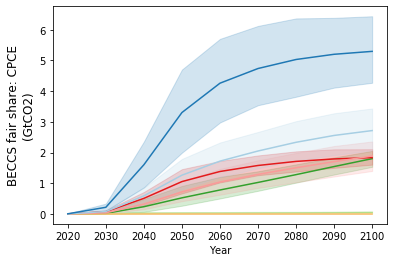

In [62]:
ax=sns.lineplot(x='Year',
                y='BECCS_fair_share_by_CUM_POP' ,
                data=data, 
                hue="Region",
                palette=colour_palette,
                legend=False)
plt.ylabel('BECCS fair share: CPCE\n(GtCO2)', fontsize = 12)
plt.savefig(plot_path + 'BECCS_fair_share_CPCE.png', bbox_inches='tight')


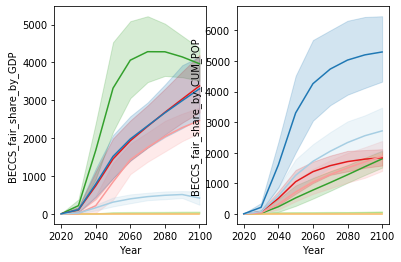

In [63]:
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]

plt.subplot(1,2,1)
sns.lineplot(x='Year',
                 y='BECCS_fair_share_by_GDP',
                 data=data, hue="Region",
                 palette=colour_palette,
                 legend=False)
plt.subplot(1,2,2)
sns.lineplot(x='Year',
                y='BECCS_fair_share_by_CUM_POP' ,
                data=data, 
                hue="Region",
                palette=colour_palette,
                legend=False)




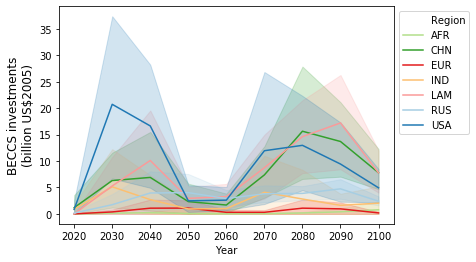

In [16]:
colours = sns.color_palette("Paired",12)
colour_palette = [colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
scen_15 = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17','SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17','SSP5-26-SPA5-V17']

data=allmodels_equal_df.loc[(allmodels_equal_df.Region.isin(reg))]
                        #& (allmodels_equal_df.Scenario.isin(scen_2))]
sns.lineplot(x='Year',y='BECCS_Investments' ,data=data, hue="Region",palette=colour_palette)
plt.ylabel('BECCS investments\n(billion US$2005)', fontsize = 12)
plt.legend(bbox_to_anchor=(1,1),ncol=1)
#plt.suptitle('BECCS investments over time for all regions and scenarios', fontsize = 14)

#TOTAL_CDR_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].TOTAL_CDR
#TOTAL_BECCS_2100 = allmodels_equal_df.loc[(allmodels_equal_df.Year == 2100)].BECCS
plt.savefig(plot_path + 'Least cost: BECCS investments over time- all scenarios.png', bbox_inches='tight')

# Old plots 

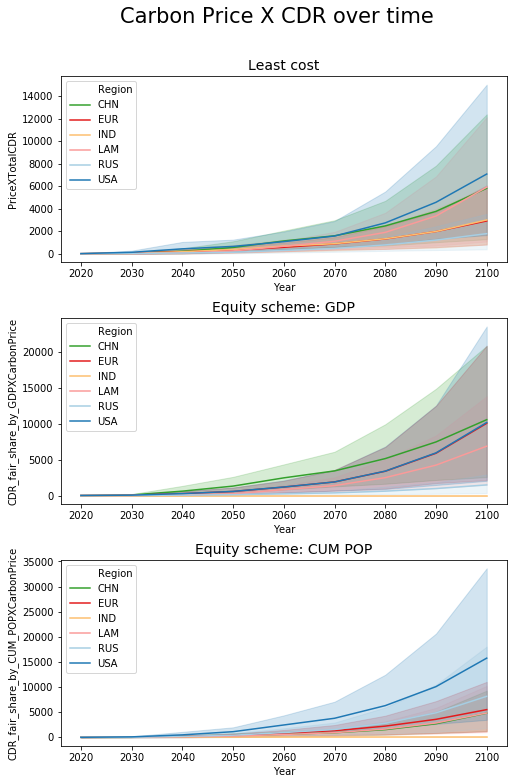

In [77]:
reg=['LAM', 'USA', 'CHN', 'RUS', 'EUR','IND']
scen_15 = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] # high overshoot
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17','SSP5-26-SPA5-V17']

colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]

fig, axes = plt.subplots(3,1, figsize=(8,12))
plt.suptitle('Carbon Price X CDR over time', fontsize = 21)
plt.subplots_adjust(top=0.9, wspace=0.3, hspace = 0.3)

CDRXPriceperBillion=allmodels_equal_df['PriceXTotalCDR'].astype(float)/1000000000
CDR_by_GDPXPriceperBillion=allmodels_equal_df['CDR_fair_share_by_GDPXCarbonPrice'].astype(float)/1000000000
CDR_by_POPXPriceperBillion=allmodels_equal_df['CDR_fair_share_by_CUM_POPXCarbonPrice'].astype(float)/1000000000

data=allmodels_equal_df[(allmodels_equal_df.Region.isin(reg))].copy()

sns.lineplot(x='Year',y=CDRXPriceperBillion ,data=data, hue="Region", palette=colour_palette, ax=axes[0]
            ).set_title('Least cost', fontsize = 14)
sns.lineplot(x='Year',y=CDR_by_GDPXPriceperBillion ,data=data, hue="Region", palette=colour_palette, ax=axes[1]
            ).set_title('Equity scheme: GDP', fontsize = 14)
sns.lineplot(x='Year',y=CDR_by_POPXPriceperBillion ,data=data, hue="Region", palette=colour_palette, ax=axes[2]
            ).set_title('Equity scheme: CUM POP', fontsize = 14)
#ax.set(xlabel='Year', ylabel='BECCS investments & Price*LeastCostCDR(US$2005)')
plt.savefig(plot_path + 'CarbonPriceXCDR_analysis.png') #bbox_inches='tight'
#plt.show()


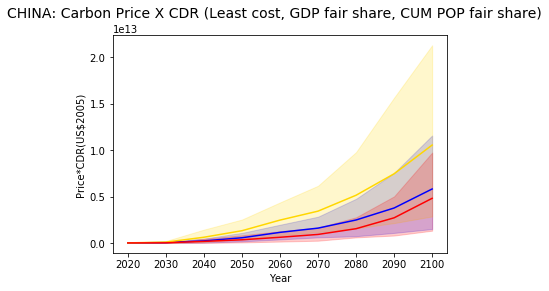

No handles with labels found to put in legend.


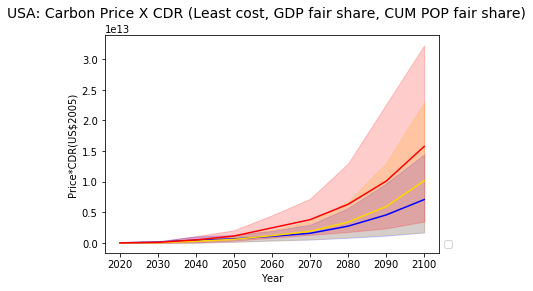

In [78]:
#Carbon Price X CDR (all schemes) for each region
data=allmodels_equal_df.loc[(allmodels_equal_df.Region==("CHN"))].copy()
ax=sns.lineplot(x='Year',y='PriceXTotalCDR' ,data=data, color='blue')
ax=sns.lineplot(x='Year',y='CDR_fair_share_by_GDPXCarbonPrice',data=data, color='gold')
ax=sns.lineplot(x='Year',y='CDR_fair_share_by_CUM_POPXCarbonPrice',data=data, color='red')

ax.set(xlabel='Year', ylabel='Price*CDR(US$2005)')
plt.suptitle('CHINA: Carbon Price X CDR (Least cost, GDP fair share, CUM POP fair share)', fontsize = 14)
plt.show()


data=allmodels_equal_df.loc[(allmodels_equal_df.Region==("USA"))].copy()
ax=sns.lineplot(x='Year',y='PriceXTotalCDR' ,data=data, color='blue')
ax=sns.lineplot(x='Year',y='CDR_fair_share_by_GDPXCarbonPrice',data=data, color='gold')
ax=sns.lineplot(x='Year',y='CDR_fair_share_by_CUM_POPXCarbonPrice',data=data, color='red')

ax.set(xlabel='Year', ylabel='Price*CDR(US$2005)')
plt.suptitle('USA: Carbon Price X CDR (Least cost, GDP fair share, CUM POP fair share)', fontsize = 14)
plt.legend(loc='lower left', bbox_to_anchor=(1,0),ncol=2)
plt.show()
#plt.savefig(plot_path + 'Annual_BECCS_vs_Price*LeastCostCDR.png', bbox_inches='tight')

No handles with labels found to put in legend.


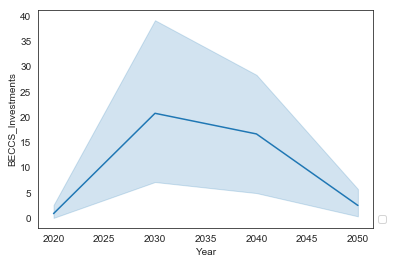

In [110]:
rego = ['USA']
scen=['SSP1-19-SPA0-V17', 
 'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17',
 'SSP1-26-SPA1-V17', 'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17',
 'SSP5-26-SPA5-V17']
yr=['2020','2030','2040','2050']
single_rego=allmodels_equal_df[(allmodels_equal_df.Scenario.isin(scen)
                               ) & (allmodels_equal_df.Region.isin(rego)
                                   ) & (allmodels_equal_df.Year.isin(yr))].copy()
sns.lineplot(x='Year',y='BECCS_Investments',data=single_rego, legend="full") #hue="Scenario"
plt.legend(loc='lower left', bbox_to_anchor=(1,0),ncol=2)

In [7]:
# Prepare data for boxplots

boxplot_df_allmodels = allmodels_df.melt(id_vars=['MODEL', 'Region', 'Scenario', 'Year'], value_vars=['Total_CO2', 'BECCS', 'LANDCDR',
       'TOTAL_CDR', 'CO2_Emissions', 'CUM_CO2', 'CUM_CDR', 'Unit_CO2',
       'Population', 'GDP', 'Unit_Population', 'cumPopulation', 'Unit_GDP',
       'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'GDP_CoI_frac', 'CDR_fair_share_by_GDP',
       'CUM_CDR_fair_share_by_GDP', 'Global_CUM_CO2_by_CUM_POP',
       'Fair_share_by_CUM_POP', 'Excess_emissions_by_CUM_POP',
       'Exc_em_fac_by_CUM_POP', 'CDR_fair_share_by_CUM_POP',
       'CUM_CDR_fair_share_by_CUM_POP', 'CDR_model_vs_fair_share_by_CUM_POP',
       'CDR_model_vs_fair_share_by_GDP',
       'CUM_CDR_model_vs_fair_share_by_CUM_POP',
       'CUM_CDR_model_vs_fair_share_by_GDP','CUM_BECCS_Investments','CUM_BECCS_Investments_by_POP',
       'CUM_BECCS_investments_by_GDP','CUM_PriceXTotalCDR', 'CUM_CDR_fair_share_by_GDPXCarbonPrice',
       'CUM_CDR_fair_share_by_CUM_POPXCarbonPrice']).reset_index()

#boxplot_df_allmodels

/Users/Broccolee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Broccolee/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


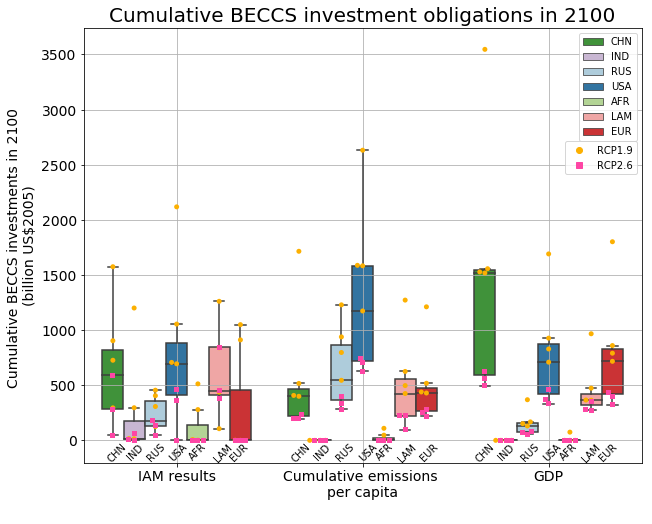

In [19]:
# Figure 1 - all scenarios 2100

scen_allmodels = ['SSP1-19-SPA0-V17', #1.5 no/limited overshoot
              'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17', #1.5 overshoot
              'SSP2-26-SPA2-V17', 'SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2.0 compatible
scen_15_lo = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] # high overshoot
scen_15_all= ['SSP1-19-SPA0-V17','SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] #all 1.5 scens
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2° scens

colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[8],colours[0],colours[1],colours[2],colours[4], colours[5]]
regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050','2100']
variab = ['CUM_BECCS_Investments', 'CUM_BECCS_investments_by_GDP', 'CUM_BECCS_Investments_by_POP']
boxp_2100 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year==(2100)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2100['value'] = boxp_2100['value'].astype(float)

#boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_lo)]
#boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]


sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,8))

box1 = sns.boxplot(x="variable", y="value", data=boxp_2100, hue = 'Region', 
                   hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], 
                   palette = colour_palette, showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'
box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

colours_15 = ["yellow orange"]
pal_15 = sns.xkcd_palette(colours_15)
boxp_15 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_15_all)]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o', facecolors='none', dodge = True)
colours_2 = ["barbie pink"]
pal_2 = sns.xkcd_palette(colours_2)
boxp_2 = boxp_2100.loc[boxp_2100.Scenario.isin(scen_2)]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_2, marker = 's', facecolors='none', dodge = True)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([], [], linestyle = 'none', marker = 'o', color="xkcd:yellow orange", label = 'RCP1.9'),
                         Line2D([], [], linestyle = 'none', marker = 's', color='xkcd:barbie pink', label = 'RCP2.6')], 
                loc = 'best', bbox_to_anchor =(1.0, 0.75))

plt.gca().add_artist(l)

box1.set_ylabel("Cumulative BECCS investments in 2100 \n(billion US$2005)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(xticklabels=['IAM results','Cumulative emissions \nper capita','GDP'])
box1.set_title("Cumulative BECCS investment obligations in 2100", fontsize=20)
box1.tick_params(labelsize=14)
box1.grid('on')

plt.savefig(plot_path + 'Boxplot-cum_BECCS_investments_2100.png')

/Users/Broccolee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Broccolee/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


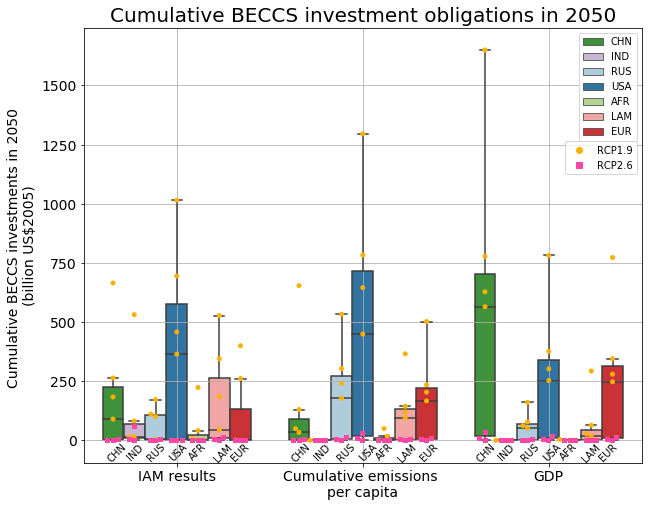

In [18]:
# Figure 2 - all scenarios 2050

scen_allmodels = ['SSP1-19-SPA0-V17', #1.5 no/limited overshoot
              'SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17', #1.5 overshoot
              'SSP2-26-SPA2-V17', 'SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2.0 compatible
scen_15_lo = ['SSP1-19-SPA0-V17'] #only no / limited overshoot
scen_15_ho = ['SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] # high overshoot
scen_15_all= ['SSP1-19-SPA0-V17','SSP2-LF-SPA2-V17', 'SSP1-19-SPA1-V17', 'SSP5-19-SPA5-V17'] #all 1.5 scens
scen_2 = ['SSP2-26-SPA2-V17','SSP1-26-SPA1-V17', 'SSP5-26-SPA5-V17'] #2° scens

colours = sns.color_palette("Paired",12)
colour_palette = [colours[3],colours[8],colours[0],colours[1],colours[2],colours[4],colours[5]]
regions = ['USA', 'CHN', 'RUS', 'EUR', 'AFR', 'LAM', 'IND']
years = ['2050','2100']
variab = ['CUM_BECCS_Investments', 'CUM_BECCS_investments_by_GDP', 'CUM_BECCS_Investments_by_POP']
boxp_2050 = boxplot_df_allmodels.loc[(boxplot_df_allmodels.Region.isin(regions)) &
                            (boxplot_df_allmodels.Scenario.isin(scen_allmodels)) &
                            (boxplot_df_allmodels.Year==(2050)) &
                            (boxplot_df_allmodels.variable.isin(variab))]

boxp_2050['value'] = boxp_2050['value'].astype(float)

sns.set_context(font_scale=1, rc={"axes.labelsize":12})

f, axes = plt.subplots(1, 1, figsize=(10,8))

box1 = sns.boxplot(x="variable", y="value", data=boxp_2050, hue = 'Region', 
                   hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'], 
                   palette = colour_palette, showfliers=False) # palette = 'Paired', palette = "coolwarm" or "husl", orient= 'horizontal'

box1.annotate('CHN', xy=(0.04, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.075, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.11, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.15, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.185, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.23, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.26, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.37, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.41, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.45, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.49, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.52, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.56, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.6, 0.03), xycoords='axes fraction', rotation=45)

box1.annotate('CHN', xy=(0.7, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('IND', xy=(0.74, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('RUS', xy=(0.78, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('USA', xy=(0.82, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('AFR', xy=(0.85, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('LAM', xy=(0.89, 0.03), xycoords='axes fraction', rotation=45)
box1.annotate('EUR', xy=(0.92, 0.03), xycoords='axes fraction', rotation=45)

colours_15 = ["yellow orange"]
pal_15 = sns.xkcd_palette(colours_15)
boxp_15 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_15_all)]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_15, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_15, marker = 'o', facecolors='none', dodge = True)
colours_2 = ["barbie pink"]
pal_2 = sns.xkcd_palette(colours_2)
boxp_2 = boxp_2050.loc[boxp_2050.Scenario.isin(scen_2)]
box1 = sns.swarmplot(x="variable", y="value", data=boxp_2, hue = 'Region', hue_order = ['CHN', 'IND', 'RUS', 'USA', 'AFR', 'LAM', 'EUR'],
                     palette = pal_2, marker = 's', facecolors='none', dodge = True)

handles, labels = box1.get_legend_handles_labels()
l = plt.legend(handles[0:7], labels[0:7])
l2 = plt.legend(handles=[Line2D([], [], linestyle = 'none', marker = 'o', color="xkcd:yellow orange", label = 'RCP1.9'),
                         Line2D([], [], linestyle = 'none', marker = 's', color='xkcd:barbie pink', label = 'RCP2.6')], 
                loc = 'best', bbox_to_anchor =(1.0, 0.75))

plt.gca().add_artist(l)

box1.set_ylabel("Cumulative BECCS investments in 2050 \n(billion US$2005)", fontsize = 14)
box1.set(xlabel = " ")
box1.set(xticklabels=['IAM results','Cumulative emissions \nper capita','GDP'])
box1.set_title("Cumulative BECCS investment obligations in 2050", fontsize=20)
box1.tick_params(labelsize=14)
box1.grid('on')

plt.savefig(plot_path + 'Boxplot-cum_BECCS_investments_2050.png')